In [1]:
from CanDataLoader import CanDataLoader
from dotenv import load_dotenv
import os

load_dotenv()
data_path = os.getenv('DATA_PATH')
dataset = CanDataLoader(data_path, log_verbosity=2)


Found ambient and attack directories.
Loading CAN metadata...
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_basic_long.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_basic_short.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_benign_anomaly.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_extended_long.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_extended_short.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_radio_infotainment.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_drive_winter.parquet
  Looking for /Users/jamescourson/Documents/CANIDS/data/ambient/parquet/ambient_dyno_exercise_all_bits.parquet
  Looking for /Users/jamescourson/Documen

In [2]:
# config = {
#     "delta_time_last_msg": {
#         "specific_to_can_id": False,
#         "records_back": 10
#     },
#     "delta_time_last_same_aid": {
#         "specific_to_can_id": True,
#         "records_back": 5
#     }
# }

# train, test = dataset.prepare_data(config)


Preparing training data...


100%|██████████| 12/12 [01:05<00:00,  5.47s/it]


  Done preparing training data. Converting to np array
Preparing testing data...


100%|██████████| 20/20 [04:14<00:00, 12.71s/it]

  Done preparing testing data. Converting to np array


In [4]:
train

[[0.023936986923217773,
  1505,
  '893FE00B0A000080',
  9.5367431640625e-07,
  0.009634017944335938,
  False,
  0.0009989738464355469,
  0.0012509822845458984,
  0.0010111331939697266,
  0.0012989044189453125,
  0.0009989738464355469,
  1.9073486328125e-06,
  0.0010361671447753906,
  0.0010190010070800781,
  9.5367431640625e-07,
  9.5367431640625e-07,
  0.010658979415893555,
  0.02002096176147461,
  0.01041412353515625,
  0.019655942916870117,
  0.010124921798706055],
 [0.02393794059753418,
  1760,
  '0000000000000000',
  9.5367431640625e-07,
  0.008616924285888672,
  False,
  9.5367431640625e-07,
  0.0009989738464355469,
  0.0012509822845458984,
  0.0010111331939697266,
  0.0012989044189453125,
  0.0009989738464355469,
  1.9073486328125e-06,
  0.0010361671447753906,
  0.0010190010070800781,
  9.5367431640625e-07,
  0.009634017944335938,
  0.010658979415893555,
  0.02002096176147461,
  0.01041412353515625,
  0.019655942916870117],
 [0.023939132690429688,
  354,
  '00080003EA11F4CE',
  

In [ ]:
for df in dataset.attack_data:
    print(df)

/var/folders/z3/d17r3zxx2g3gjt2dl654wrpr0000gn/T/ipykernel_99613/2196880103.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


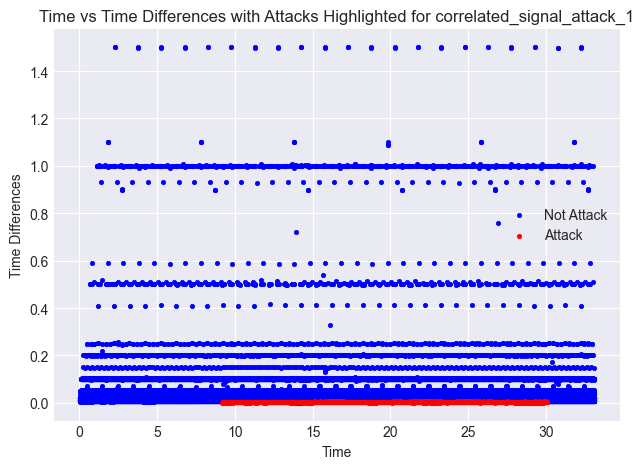

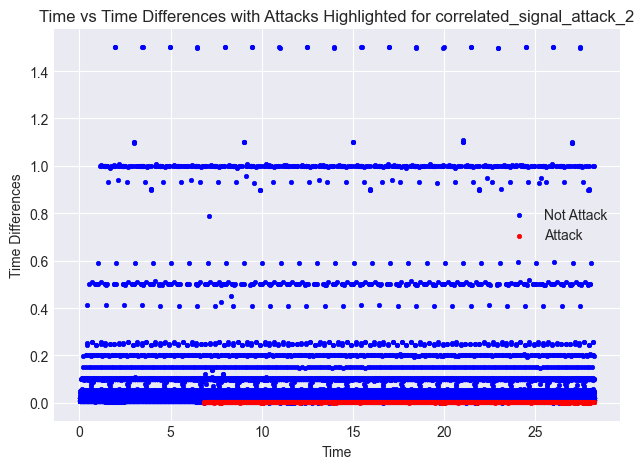

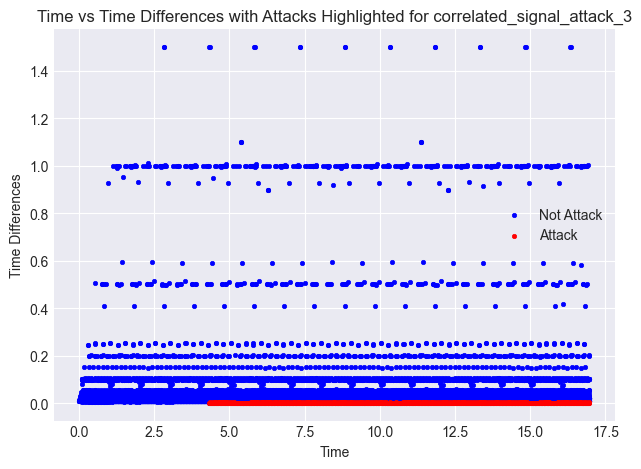

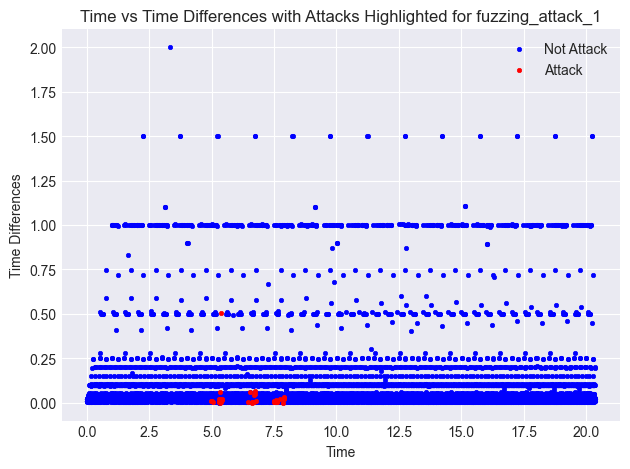

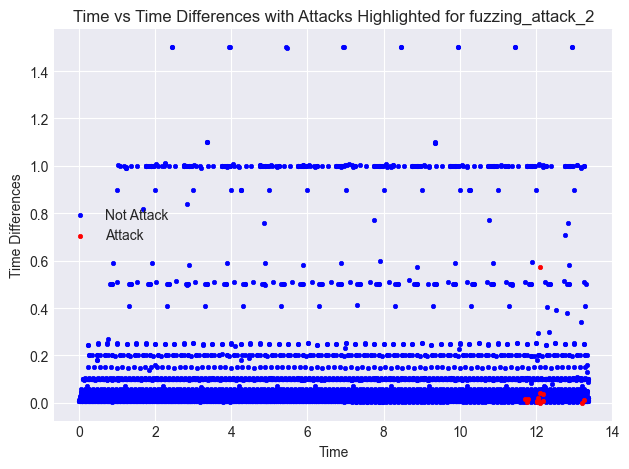

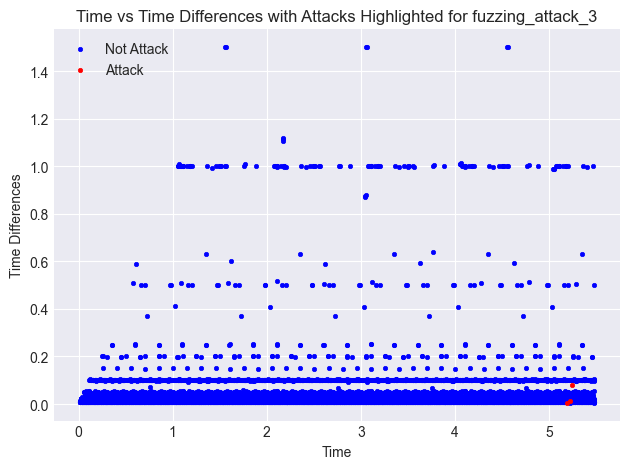

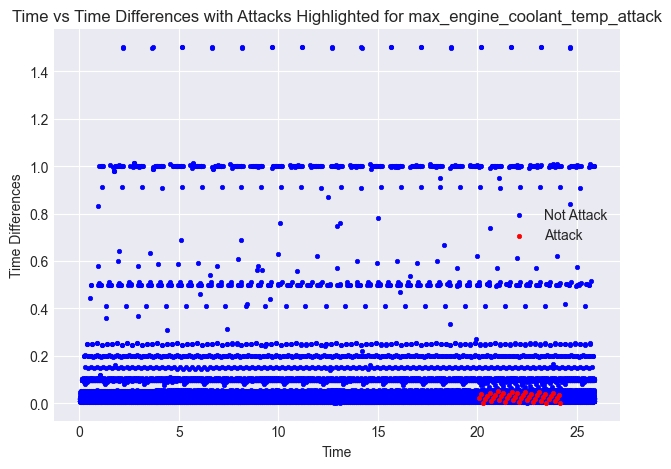

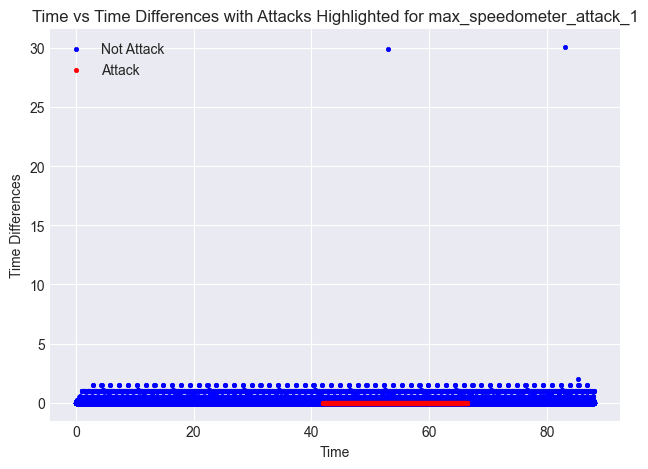

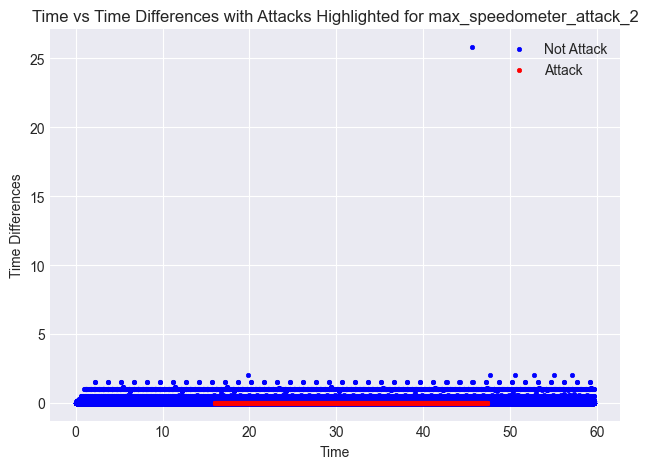

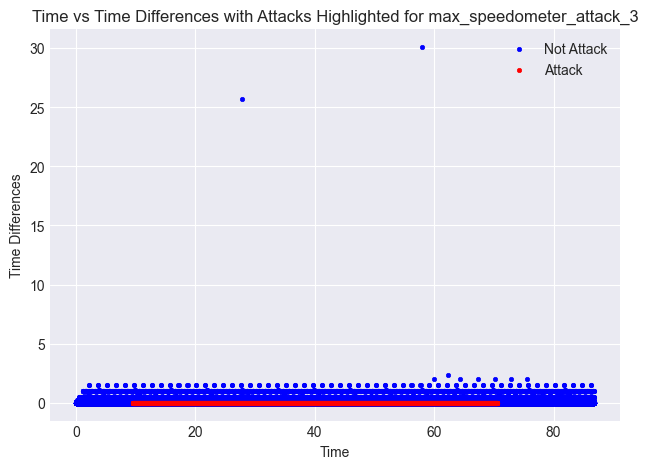

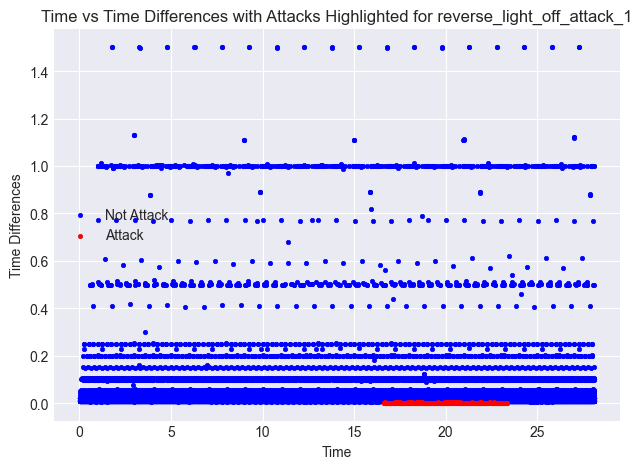

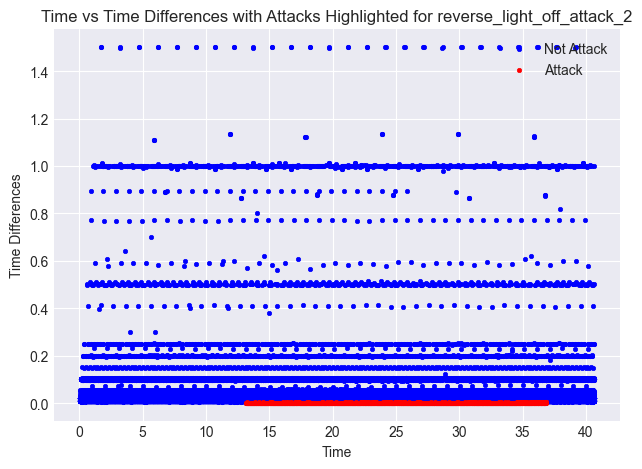

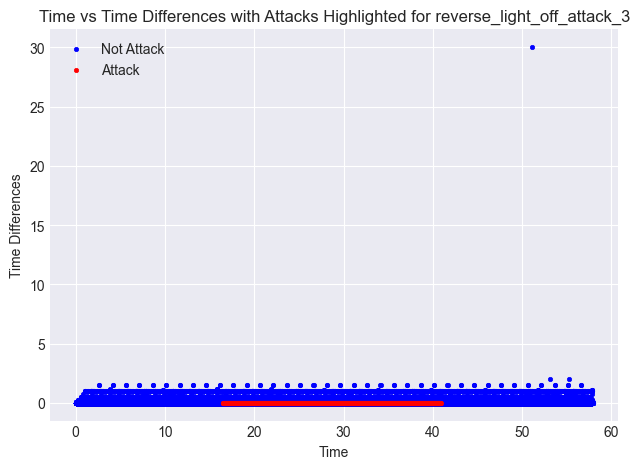

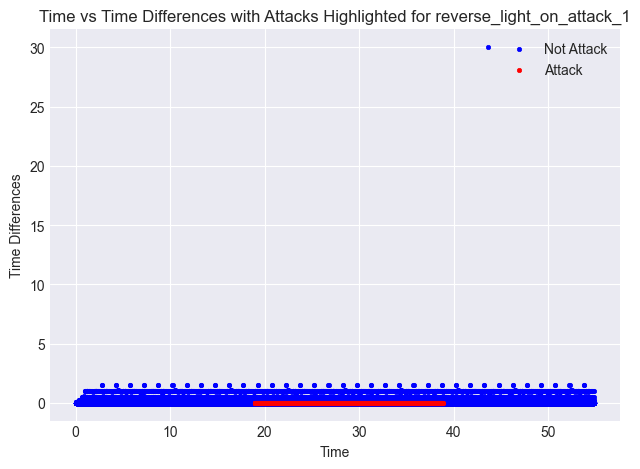

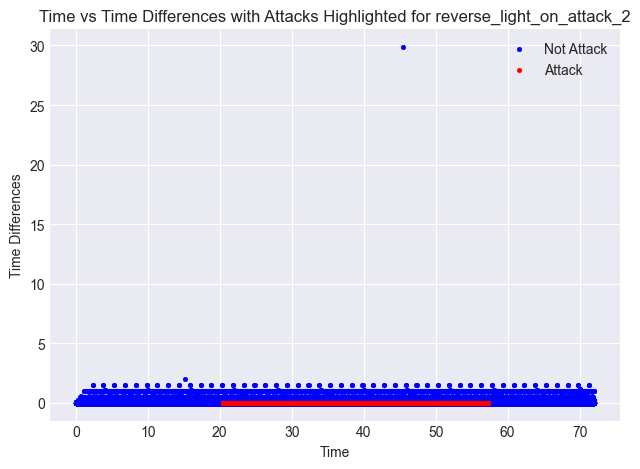

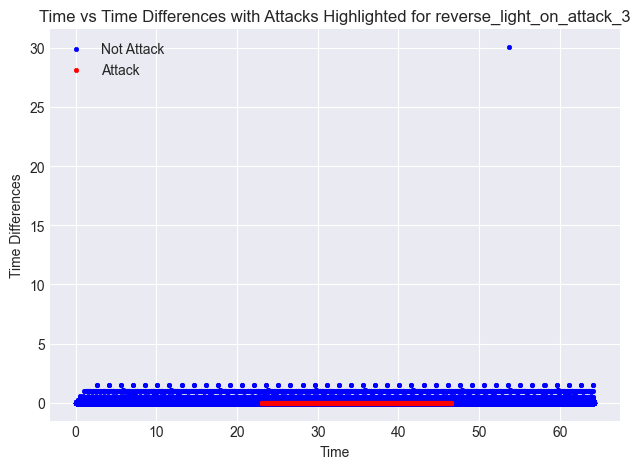

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

for i, df in enumerate(dataset.attack_data):
    if "actual_attack" in df.columns:
        
        # highlight the attacks
        not_attacks = df[df["actual_attack"] == 0]
        plt.scatter(not_attacks["time"], not_attacks["delta_time_last_same_aid"], c="blue", s=10, label="Not Attack", linewidth=0.5)
        
        # highlight the attacks
        attacks = df[df["actual_attack"] == 1]
        plt.scatter(attacks["time"], attacks["delta_time_last_same_aid"], c="red", s=10, label="Attack", linewidth=0.5)
        

        plt.xlabel("Time")
        plt.ylabel("Time Differences")
        plt.title(f"Time vs Time Differences with Attacks Highlighted for {dataset.attack_files[i]}")
        plt.legend()
        plt.tight_layout()
        plt.show()

/var/folders/z3/d17r3zxx2g3gjt2dl654wrpr0000gn/T/ipykernel_99613/644465547.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


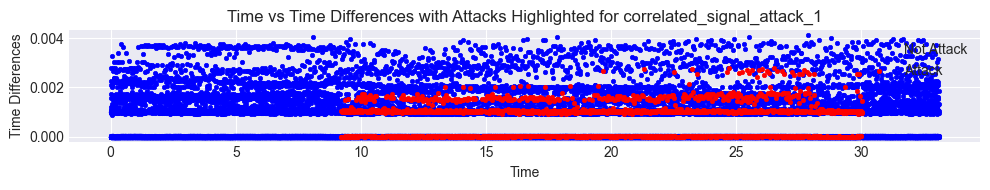

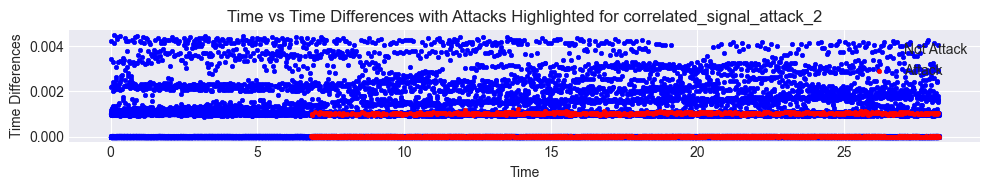

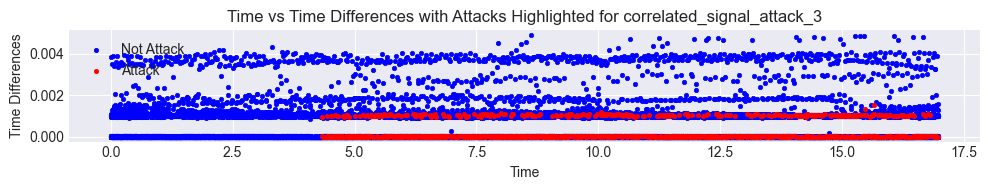

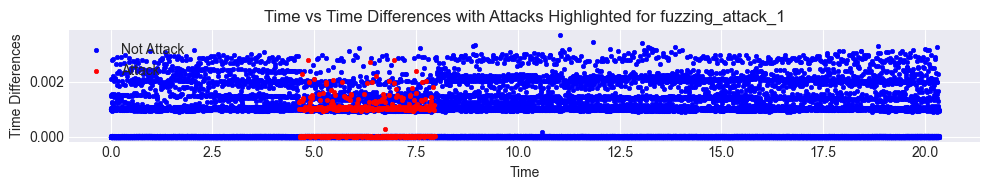

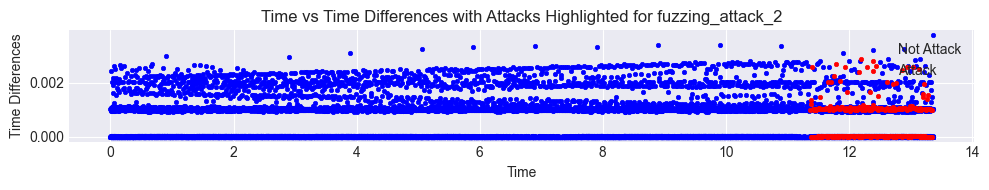

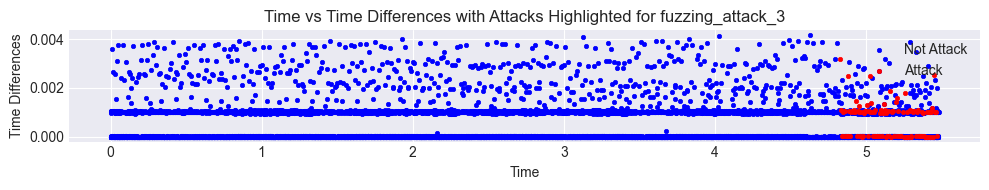

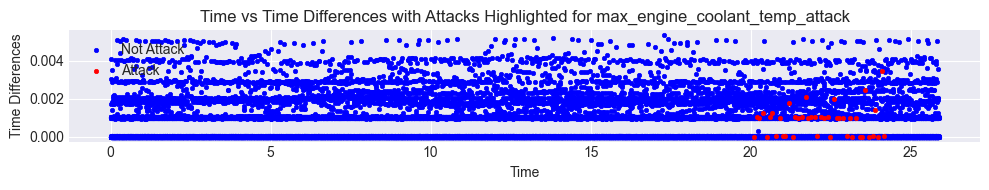

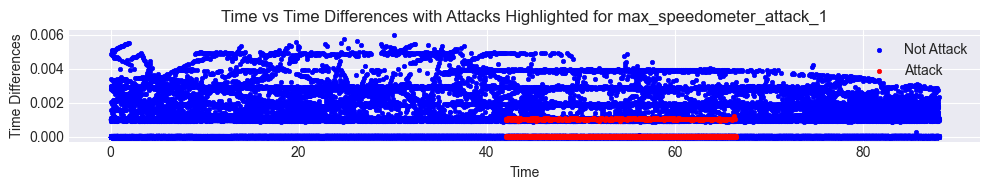

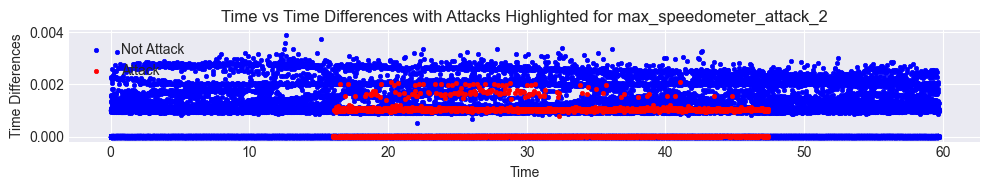

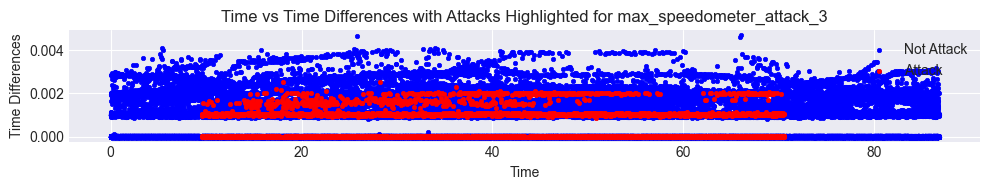

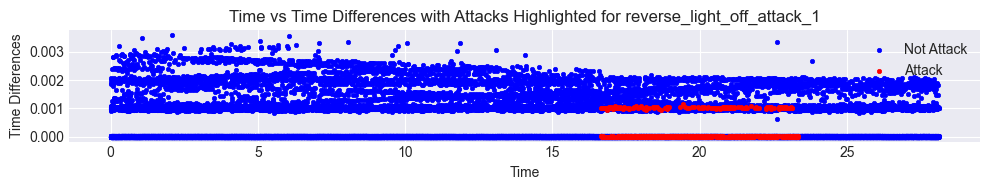

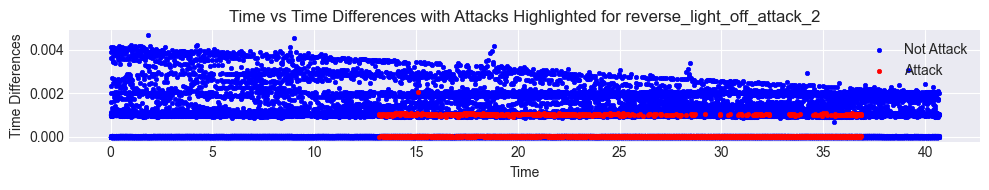

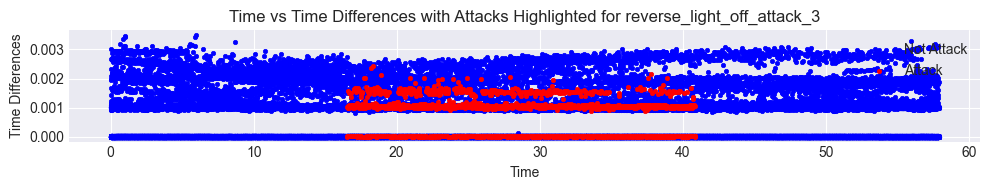

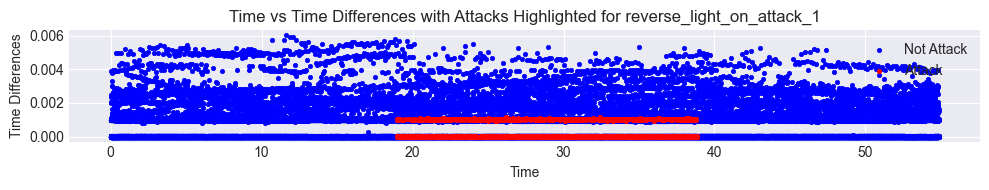

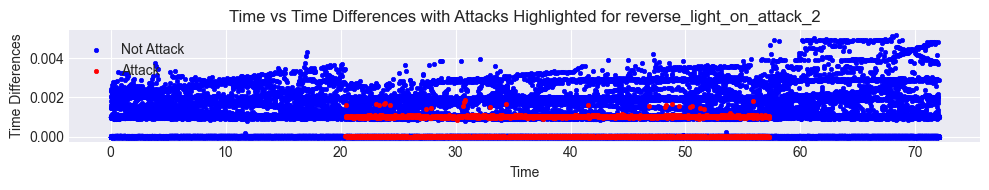

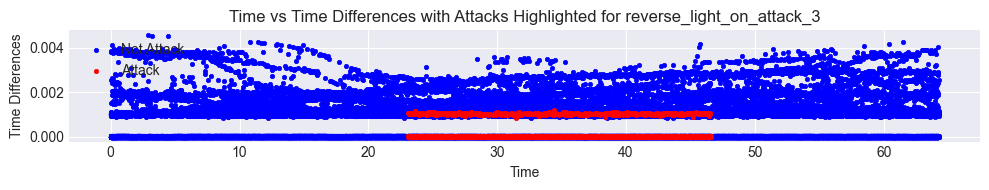

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

for i, df in enumerate(dataset.attack_data):
    if "actual_attack" in df.columns:
        
        plt.figure(figsize=(10, 2))
        # highlight the attacks
        not_attacks = df[df["actual_attack"] == 0]
        plt.scatter(not_attacks["time"], not_attacks["delta_time_last_msg"], c="blue", s=10, label="Not Attack", linewidth=0.5)
        
        # highlight the attacks
        attacks = df[df["actual_attack"] == 1]
        plt.scatter(attacks["time"], attacks["delta_time_last_msg"], c="red", s=10, label="Attack", linewidth=0.5)
        
        # make the plot size flat and long   

        plt.xlabel("Time")
        plt.ylabel("Time Differences")
        plt.title(f"Time vs Time Differences with Attacks Highlighted for {dataset.attack_files[i]}")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [ ]:
for df in dataset.attack_data.reverse_light_off_attack_1.groupby("aid"):
    print(df[1])

In [ ]:

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

for i, df in enumerate(dataset.attack_data.reverse_light_off_attack_1.groupby("aid")):
    df = df[1]
    # check if there are any true attacks if not skip
    

    if "actual_attack" in df.columns:
        
        # highlight the attacks
        not_attacks = df[df["actual_attack"] == 0]
        plt.scatter(not_attacks["time"], not_attacks["delta_time_last_msg"], c="blue", s=10, edgecolors='black', label="Not Attack", linewidth=0.5)
        
        # highlight the attacks
        attacks = df[df["actual_attack"] == 1]
        plt.scatter(attacks["time"], attacks["delta_time_last_msg"], c="red", s=10, edgecolors='black', label="Attack", linewidth=0.5)
        

        plt.xlabel("Time")
        plt.ylabel("Time Differences")
        plt.title(f"Time vs Time Differences with Attacks Highlighted for {dataset.attack_files[i]}")
        plt.legend()
        plt.tight_layout()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('seaborn-darkgrid')

# Create a color map for unique aids
unique_aids = np.concatenate([df['aid'].unique() for df in dataset.attack_data])
colors = plt.cm.jet(np.linspace(0, 1, len(unique_aids)))
color_map = dict(zip(unique_aids, colors))

for i, df in enumerate(dataset.attack_data):
    if "actual_attack" in df.columns:
        
        # Plot for not attacks
        not_attacks = df[df["actual_attack"] == 0]
        not_attack_colors = not_attacks['aid'].map(color_map)
        plt.scatter(not_attacks["time"], not_attacks["delta_time_last_same_aid"], c=not_attack_colors, s=10, label="Not Attack", linewidth=0.5)
        
        # Plot for attacks
        attacks = df[df["actual_attack"] == 1]
        # attack_colors = attacks['aid'].map(color_map)
        plt.scatter(attacks["time"], attacks["delta_time_last_same_aid"], c="red", s=10, edgecolors='black', label="Attack", linewidth=0.5)
        
        plt.xlabel("Time")
        plt.ylabel("Time Differences")
        plt.title(f"Time vs Time Differences with Attacks Highlighted for {dataset.attack_files[i]}")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [ ]:

for df in dataset.attack_data:
    print(df)
